In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import cv2
import os
import glob
import time
import shutil
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

from skimage.feature import hog
from skimage import exposure
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.preprocessing import StandardScaler

In [3]:
# 創建資料夾


os.mkdir('train') # 創建train資料夾
os.mkdir('test') # 創建test資料夾
os.mkdir('validation') # 創建vaildation資料夾

# 建立類別list
imagelist = os.listdir('C:/Users/User/Desktop/Deep Learning/Assignment-1 Image classiication/images')
print(type(imagelist))
print(imagelist)

<class 'list'>
['n02111277', 'n02111500', 'n02111889', 'n02112018', 'n02112137', 'n02112350', 'n02112706', 'n02113023', 'n02113186', 'n02113624', 'n02113712', 'n02113799', 'n02113978', 'n02114367', 'n02114548', 'n02114712', 'n02114855', 'n02115641', 'n02115913', 'n02116738', 'n02117135', 'n02119022', 'n02119789', 'n02120079', 'n02120505', 'n02123045', 'n02123159', 'n02123394', 'n02123597', 'n02124075', 'n02125311', 'n02127052', 'n02128385', 'n02128757', 'n02128925', 'n02129165', 'n02129604', 'n02130308', 'n02132136', 'n02133161', 'n02134084', 'n02134418', 'n02137549', 'n02138441', 'n02165105', 'n02165456', 'n02167151', 'n02168699', 'n02169497', 'n02172182']


In [4]:
class DL:
    def __init__(self):
        return
    
    def file_split(self, file):
        os.mkdir(file) # 創建資料夾
        imagelist = os.listdir('C:/Users/User/Desktop/Deep Learning/Assignment-1 Image classiication/images')
        f = open(file + '.txt') # 打開train.txt檔

        for i in range(22, 50):
            os.mkdir(file + '/' + file + str(i)) # 創建50個類別的資料夾

            for txt in f.readlines(): #逐行讀取test.txt

                for image in glob.glob('images/' + imagelist[i] + '/*.*'): # 讀取images下所有檔案

                    if (txt[17:32] == image[17:32]): # 對比txt及image名稱一不一樣

                        if '.JPEG ' in txt[17:34]: # 1位數
                            shutil.copy('images/' + imagelist[i] + '/' + image[17:28] +'.JPEG', './' + file + '/'+ file + str(i))
                        elif '.JPEG' in txt[17:34]: # 2位數
                            shutil.copy('images/' + imagelist[i] + '/' + image[17:29] +'.JPEG', './' + file + '/'+ file + str(i)) # 複製檔案至test目錄
                        elif '.JPE' in txt[17:34]: # 3位數
                            shutil.copy('images/' + imagelist[i] + '/' + image[17:30] +'.JPEG', './' + file + '/'+ file + str(i))
                        elif '.JP' in txt[17:34]: # 4位數
                            shutil.copy('images/' + imagelist[i] + '/' + image[17:31] +'.JPEG', './' + file + '/'+ file + str(i))
                        elif '.J' in txt[17:34]: # 5位數
                            shutil.copy('images/' + imagelist[i] + '/' + image[17:32] +'.JPEG', './' + file + '/'+ file + str(i))

        f.seek(0)
    
    
    def dataset_split(self, file):
        if file == 'train':
            starttime = int(time.time())
            train_images = []
            image_list = os.listdir('train/')
            image_list.sort(key = lambda x: int(x[5:]))


            for i in range(len(image_list)):
                j = 0
                for images in glob.glob('train/' + image_list[i] + '/*'):
                    j+=1
                    if j == 121: # 只取前120張
                        break
                    img = cv2.imread(images) # 圖片讀檔
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 轉灰階
                    img = cv2.resize(img, (256, 256))
                    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True)
                    train_images.append(hog_image)

            train_images = np.array(train_images)
            print(train_images.shape)
            nsamples, nx, ny = train_images.shape
            d2_train_images = train_images.reshape((nsamples,nx*ny))
            print(type(d2_train_images))
            print(d2_train_images.shape)
            print(d2_train_images)


            train_labels = []
            image_list = os.listdir('train/')
            image_list.sort(key = lambda x: int(x[5:]))

            for i in range(len(image_list)):
                j = 0
                for labels in glob.glob('train/' + image_list[i] + '/*'):
                    j+=1
                    if j == 121:
                        break
                    train_labels.append(i)

            train_labels = np.array(train_labels)
            endtime = int(time.time())
            print('花了',endtime-starttime,'s')
            print(type(train_labels))
            print(len(train_labels))
            print(train_labels)
            
        elif file == 'validation':
            
            starttime = int(time.time())
            validation_images = []
            image_list = os.listdir('validation/')
            image_list.sort(key = lambda x: int(x[10:]))

            for i in range(len(image_list)):
                for images in glob.glob('validation/' + image_list[i] + '/*'):
                    img = cv2.imread(images) # 圖片讀檔
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 轉灰階
                    img = cv2.resize(img, (256, 256))
                    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True)
                    validation_images.append(hog_image)

            validation_images = np.array(validation_images)
            print(validation_images.shape)
            nsamples, nx, ny = validation_images.shape
            d2_validation_images = validation_images.reshape((nsamples,nx*ny))
            print(type(d2_validation_images))
            print(d2_validation_images.shape)
            print(d2_validation_images)


            validation_labels = []
            image_list = os.listdir('validation/')
            image_list.sort(key = lambda x: int(x[10:]))


            for i in range(len(image_list)):
                for labels in glob.glob('validation/' + image_list[i] + '/*'):
                    validation_labels.append(i)

            validation_labels = np.array(validation_labels)

            endtime = int(time.time())
            print(type(validation_labels))
            print(len(validation_labels))
            print(validation_labels)
            print('花了',endtime-starttime,'s')
            
        elif file == 'test':
            starttime = int(time.time())
            test_images = []
            image_list = os.listdir('test/')
            image_list.sort(key = lambda x: int(x[4:]))

            for i in range(len(image_list)):
                for images in glob.glob('test/' + image_list[i] + '/*'):
                    img = cv2.imread(images) # 圖片讀檔
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 轉灰階
                    img = cv2.resize(img, (256, 256))
                    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True)
                    test_images.append(hog_image)

            test_images = np.array(test_images)
            print(test_images.shape)
            nsamples, nx, ny = test_images.shape
            d2_test_images = test_images.reshape((nsamples,nx*ny))
            print(type(d2_test_images))
            print(d2_test_images.shape)
            print(d2_test_images)


            test_labels = []
            image_list = os.listdir('test/')
            image_list.sort(key = lambda x: int(x[4:]))


            for i in range(len(image_list)):
                for labels in glob.glob('test/' + image_list[i] + '/*'):
                    test_labels.append(i)

            test_labels = np.array(test_labels)
            endtime = int(time.time())

            print(type(test_labels))
            print(len(test_labels))
            print(test_labels)
            print('花了',endtime-starttime,'s')

In [14]:
# 將train圖片做特徵提取，並存成np.array
starttime = int(time.time())
train_images = []
image_list = os.listdir('train/')
image_list.sort(key = lambda x: int(x[5:]))


for i in range(len(image_list)):
    j = 0
    for images in glob.glob('train/' + image_list[i] + '/*'):
        j+=1
        if j == 121: # 只取前120張
            break
        img = cv2.imread(images) # 圖片讀檔
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 轉灰階
        img = cv2.resize(img, (256, 256))
        fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True)
        train_images.append(hog_image)


train_images = np.array(train_images)
print(train_images.shape)
nsamples, nx, ny = train_images.shape
d2_train_images = train_images.reshape((nsamples,nx*ny))
print(type(d2_train_images))
print(d2_train_images.shape)
print(d2_train_images)


train_labels = []
image_list = os.listdir('train/')
image_list.sort(key = lambda x: int(x[5:]))

for i in range(len(image_list)):
    j = 0
    for labels in glob.glob('train/' + image_list[i] + '/*'):
        j+=1
        if j == 121:
            break
        train_labels.append(i)


train_labels = np.array(train_labels)
endtime = int(time.time())
print('花了',endtime-starttime,'s')
print(type(train_labels))
print(len(train_labels))
print(train_labels)

# 儲存data

# pd.DataFrame(d2_train_images).to_csv('d2_train_images.csv', index = False)
# pd.DataFrame(train_labels).to_csv('train_labels.csv', index = False)

(6000, 256, 256)
<class 'numpy.ndarray'>
(6000, 65536)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
花了 563 s
<class 'numpy.ndarray'>
6000
[ 0  0  0 ... 49 49 49]


In [2]:
# 將validation圖片做特徵提取，並存成np.array
starttime = int(time.time())
validation_images = []
image_list = os.listdir('validation/')
image_list.sort(key = lambda x: int(x[10:]))

for i in range(len(image_list)):
    for images in glob.glob('validation/' + image_list[i] + '/*'):
        img = cv2.imread(images) # 圖片讀檔
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 轉灰階
        img = cv2.resize(img, (256, 256))
        fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True)
        validation_images.append(hog_image)

validation_images = np.array(validation_images)
print(validation_images.shape)
nsamples, nx, ny = validation_images.shape
d2_validation_images = validation_images.reshape((nsamples,nx*ny))
print(type(d2_validation_images))
print(d2_validation_images.shape)
print(d2_validation_images)


validation_labels = []
image_list = os.listdir('validation/')
image_list.sort(key = lambda x: int(x[10:]))


for i in range(len(image_list)):
    for labels in glob.glob('validation/' + image_list[i] + '/*'):
        validation_labels.append(i)
        
validation_labels = np.array(validation_labels)

endtime = int(time.time())
print(type(validation_labels))
print(len(validation_labels))
print(validation_labels)
print('花了',endtime-starttime,'s')
# 儲存data

# pd.DataFrame(d2_validation_images).to_csv('d2_validation_images.csv', index = False)
# pd.DataFrame(validation_labels).to_csv('validation_labels.csv', index = False)

(450, 256, 256)
<class 'numpy.ndarray'>
(450, 65536)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
<class 'numpy.ndarray'>
450
[ 0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2
  2  2  2  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  5  5  5
  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10
 10 10 10 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 13 13 13
 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15
 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18
 18 18 18 19 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 21 21 21
 21 21 21 21 21 21 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26
 26 26 26 27 27 27 27 27 27 27 27

In [3]:
# 將test圖片做特徵提取，並存成np.array
starttime = int(time.time())
test_images = []
image_list = os.listdir('test/')
image_list.sort(key = lambda x: int(x[4:]))

for i in range(len(image_list)):
    for images in glob.glob('test/' + image_list[i] + '/*'):
        img = cv2.imread(images) # 圖片讀檔
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 轉灰階
        img = cv2.resize(img, (256, 256))
        fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True)
        test_images.append(hog_image)

test_images = np.array(test_images)
print(test_images.shape)
nsamples, nx, ny = test_images.shape
d2_test_images = test_images.reshape((nsamples,nx*ny))
print(type(d2_test_images))
print(d2_test_images.shape)
print(d2_test_images)


test_labels = []
image_list = os.listdir('test/')
image_list.sort(key = lambda x: int(x[4:]))


for i in range(len(image_list)):
    for labels in glob.glob('test/' + image_list[i] + '/*'):
        test_labels.append(i)
        
test_labels = np.array(test_labels)
endtime = int(time.time())

print(type(test_labels))
print(len(test_labels))
print(test_labels)
print('花了',endtime-starttime,'s')
# 儲存data

# pd.DataFrame(d2_test_images).to_csv('d2_test_images.csv', index = False)
# pd.DataFrame(test_labels).to_csv('test_labels.csv', index = False)

(450, 256, 256)
<class 'numpy.ndarray'>
(450, 65536)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
<class 'numpy.ndarray'>
450
[ 0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2
  2  2  2  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  5  5  5
  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10
 10 10 10 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 13 13 13
 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15
 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18
 18 18 18 19 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 21 21 21
 21 21 21 21 21 21 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26
 26 26 26 27 27 27 27 27 27 27 27

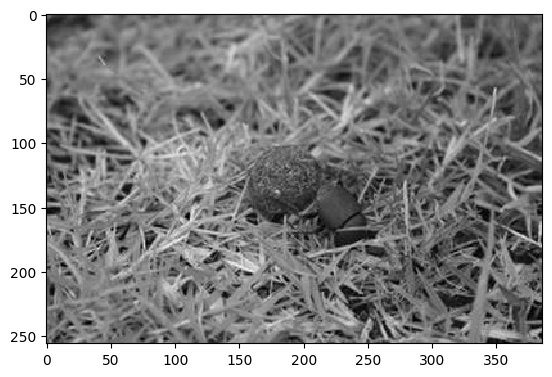

In [46]:
plt.imshow(img, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
plt.show()

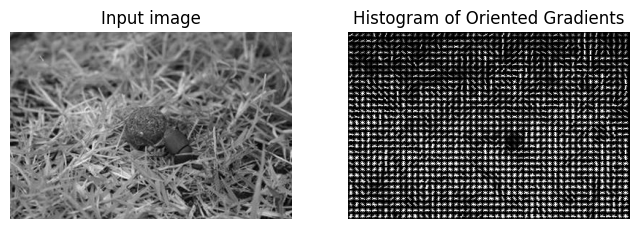

In [52]:
# 特徵提取測試

from skimage.feature import hog
from skimage import exposure

fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [15]:
# 標準化
sc = StandardScaler()
sc.fit(d2_train_images)
train_images_std = sc.transform(d2_train_images)
test_images_std = sc.transform(d2_test_images)

# 多個模型設定
models = {
    'knn': KNeighborsClassifier(n_neighbors=5),
    'tree' : DecisionTreeClassifier(random_state = 0),
    'logistic' : LogisticRegression(max_iter=1000, random_state = 0),
    'svc1' : LinearSVC(max_iter=1000, random_state = 0),
    'svc2' : SVC(kernel='linear', C=1.0, random_state = 0),
    'adaBost':AdaBoostClassifier(n_estimators=100, random_state = 0)
}

# 為了持有分數的空Dict資料
scores = {}

# 對各個模型求得分數
for model_name, model in models.items():
    starttime = int(time.time())
    model.fit(train_images_std,train_labels)
    scores[(model_name,'validation')] = model.score(train_images_std,train_labels)
    scores[(model_name,'validation')] = model.score(validation_images_std,validation_labels)
    scores[(model_name,'test')] = model.score(test_images_std,test_labels)
    endtime = int(time.time())
    print(model_name, '花了',endtime-starttime,'s')
    
    
pd.Series(scores).unstack()

knn 花了 15 s
tree 花了 593 s


C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


logistic 花了 836 s


C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


svc1 花了 9130 s
svc2 花了 2171 s
adaBost 花了 2693 s


,test,validation
adaBost,0.037778,0.028889
knn,0.028889,0.028889
logistic,0.093333,0.084444
svc1,0.033333,0.035556
svc2,0.115556,0.084444
tree,0.026667,0.028889


In [13]:
# 有用train資料及訓練的結果

starttime = int(time.time())

sc = StandardScaler()
sc.fit(d2_train_images)
train_images_std = sc.transform(d2_train_images)
test_images_std = sc.transform(d2_test_images)

models = {
    'adaBost':AdaBoostClassifier(n_estimators=100, random_state = 0)
}

# 為了持有分數的空Dict資料
scores = {}

# 對各個模型求得分數
for model_name, model in models.items():
    model.fit(train_images_std,train_labels)
    scores[(model_name,'train')] = model.score(train_images_std,train_labels)
    scores[(model_name,'test')] = model.score(test_images_std,test_labels)
    

endtime = int(time.time())
print('花了',endtime-starttime,'s')
pd.Series(scores).unstack()

花了 31418 s


,test,train
adaBost,0.064444,0.071871
